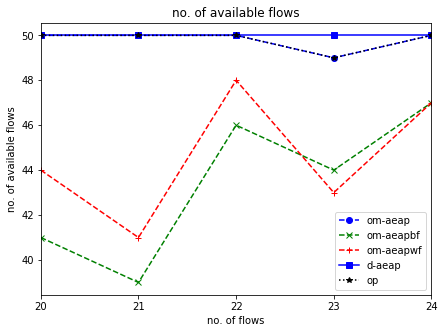

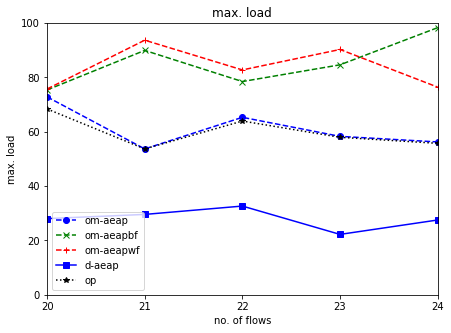

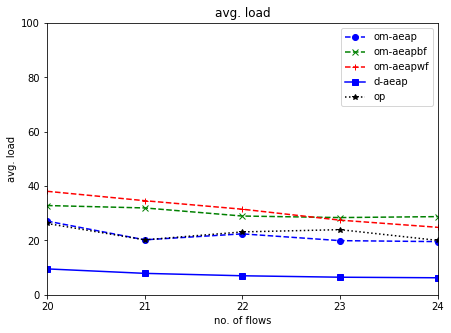

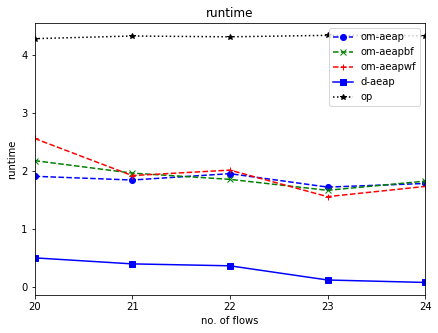

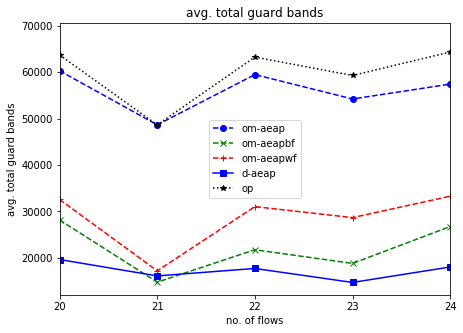

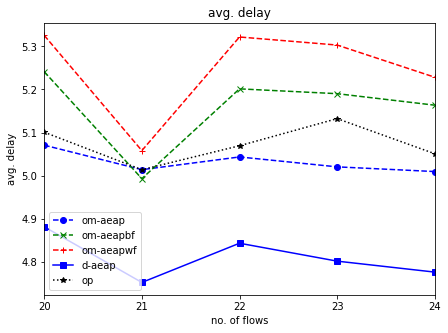

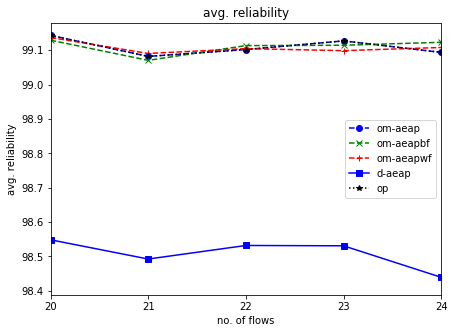

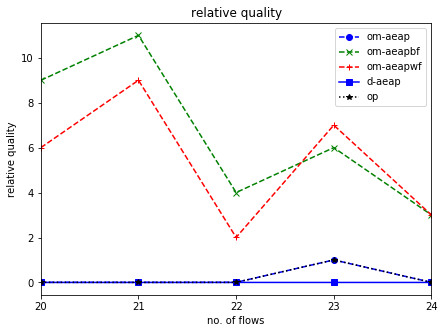

In [3]:
import csv
%matplotlib inline
import numpy as np
import os
import re
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

DIR_NAME = './graph_size/'
FIG_SIZE = (7, 5)

filenames = os.listdir(DIR_NAME)
filenames_dict = {
    'om-aeap': [],
    'om-aeapbf': [],
    'om-aeapwf': [],
    'd-aeap': [],
    # 'd-aeapbf': [],
    # 'd-aeapwf': [],
    'op': []
}

for filename in filenames:
    if re.match(r'b.*(t1|t2).*(ba|rrg|er).*backtracking.*aeap\.csv', filename):
        filenames_dict['om-aeap'].append(filename)
    elif re.match(r'b.*(t1|t2).*(ba|rrg|er).*backtracking.*aeapbf\.csv', filename):
        filenames_dict['om-aeapbf'].append(filename)
    elif re.match(r'b.*(t1|t2).*(ba|rrg|er).*backtracking.*aeapwf\.csv', filename):
        filenames_dict['om-aeapwf'].append(filename)
    elif re.match(r'b.*(t1|t2).*(ba|rrg|er).*dijkstra.*aeap\.csv', filename):
        filenames_dict['d-aeap'].append(filename)
    # elif re.match(r'b.*t1.*dijkstra.*aeapbf\.csv', filename):
    #     filenames_dict['d-aeapbf'].append(filename)
    # elif re.match(r'b.*t1.*dijkstra.*aeapwf\.csv', filename):
    #     filenames_dict['d-aeapwf'].append(filename)
    elif re.match(r'o.*(t1|t2).*(ba|rrg).*backtracking.*aeap\.csv', filename):  # only care about om-aeap
        filenames_dict['op'].append(filename)

fig_1, ax_1 = plt.subplots(figsize=FIG_SIZE)  # no. of available flows
ax_1.set_title('no. of available flows')
fig_2, ax_2 = plt.subplots(figsize=FIG_SIZE)  # max. load 
ax_2.set_title('max. load')
fig_3, ax_3 = plt.subplots(figsize=FIG_SIZE)  # avg. load
ax_3.set_title('avg. load')
fig_4, ax_4 = plt.subplots(figsize=FIG_SIZE)  # runtime
ax_4.set_title('runtime')
fig_5, ax_5 = plt.subplots(figsize=FIG_SIZE)  # total guard band
ax_5.set_title('avg. total guard bands')
fig_6, ax_6 = plt.subplots(figsize=FIG_SIZE)  # avg. delay
ax_6.set_title('avg. delay') 
fig_7, ax_7 = plt.subplots(figsize=FIG_SIZE)  # avg. reliability
ax_7.set_title('avg. reliability')
fig_8, ax_8 = plt.subplots(figsize=FIG_SIZE)  # relative quality
ax_8.set_title('relative quality')
all_no_of_flow_dict = {}
all_no_of_available_flows_dict = {}
all_max_load_dict = {}
all_avg_load_dict = {}
all_runtime_dict = {}
all_total_guard_band_dict = {}
all_delay_dict = {}
all_reliability_dict = {}
all_quality_dict = {}
for alias in filenames_dict.keys():
    all_no_of_flow_dict[alias] = []
    all_no_of_available_flows_dict[alias] = []
    all_max_load_dict[alias] = []
    all_avg_load_dict[alias] = []
    all_runtime_dict[alias] = []
    all_total_guard_band_dict[alias] = []
    all_delay_dict[alias] = []
    all_reliability_dict[alias] = []
    all_quality_dict[alias] = []
for alias, filenames in filenames_dict.items():
    for filename in filenames:
        no_of_flow_list = []
        no_of_available_flows_list = []
        max_load_list = []
        avg_load_list = []
        runtime_list = []
        total_guard_band_list = []
        delay_list = []
        reliability_list = []
        quality_list = []
        with open(os.path.join(DIR_NAME, filename), 'r') as file:
            reader = csv.reader(file)
            for line in reader:
                no_of_flow_list.append(int(line[1]))
                no_of_available_flows_list.append(int(line[3]))
                max_load_list.append(float(line[7]))
                avg_load_list.append(float(line[9]))
                runtime_list.append(float(line[6]))
                total_guard_band_list.append(int(line[13]))
                delay_list.append(int(line[12]))
                reliability_list.append(float(line[11]))
                quality_list.append(float(line[0]) - float(line[3]) + float(line[7]) / 100)
                # quality_list.append(float(line[3]) - float(line[7]) / 100)
                all_no_of_flow_dict[alias].append(no_of_flow_list)
                all_no_of_available_flows_dict[alias].append(no_of_available_flows_list)
                all_max_load_dict[alias].append(max_load_list)
                all_avg_load_dict[alias].append(avg_load_list)
                all_runtime_dict[alias].append(runtime_list)
                all_total_guard_band_dict[alias].append(total_guard_band_list)
                all_delay_dict[alias].append(delay_list)
                all_reliability_dict[alias].append(reliability_list)
                all_quality_dict[alias].append(quality_list)
for alias in filenames_dict.keys():
    if len(all_no_of_available_flows_dict[alias]) == 0:
        continue
    all_no_of_flow_array = np.array(all_no_of_flow_dict[alias]).T
    all_no_of_available_flows_array = np.array(all_no_of_available_flows_dict[alias]).T
    all_max_load_array = np.array(all_max_load_dict[alias]).T
    all_avg_load_array = np.array(all_avg_load_dict[alias]).T
    all_runtime_array = np.array(all_runtime_dict[alias]).T
    all_total_guard_band_array = np.array(all_total_guard_band_dict[alias]).T
    all_delay_array = np.array(all_delay_dict[alias]).T
    all_reliability_array = np.array(all_reliability_dict[alias]).T
    all_quality_array = np.array(all_quality_dict[alias]).T
    avg_no_of_flow_array = all_no_of_flow_array.mean(axis=1)
    avg_no_of_available_flows_array = all_no_of_available_flows_array.mean(axis=1)
    avg_max_load_array = all_max_load_array.mean(axis=1)
    avg_avg_load_array = all_avg_load_array.mean(axis=1)
    avg_runtime_array = all_runtime_array.mean(axis=1)
    avg_total_guard_band_array = all_total_guard_band_array.mean(axis=1)
    avg_delay_array = all_delay_array.mean(axis=1)
    avg_reliability_array = all_reliability_array.mean(axis=1)
    avg_quality_array = all_quality_array.mean(axis=1)
    # draw plot
    x = np.array(avg_no_of_flow_array)
    # x = np.arange(11) * 10
    tick_spacing = 1
    # markers = {'om-aeap': 'o', 'd-aeap': 'x', 'op': '+'}
    markers = {
        'om-aeap': 'o', 'om-aeapbf': 'x', 'om-aeapwf': '+',
        'd-aeap': 's', 'd-aeapbf': '^', 'd-aeapwf': '<',
        'op': '*',
    }
    colors = {
        'om-aeap': 'blue', 'om-aeapbf': 'green', 'om-aeapwf': 'red',
        'd-aeap': 'blue', 'd-aeapbf': 'green', 'd-aeapwf': 'red',
        'op': 'black',
    }
    linestyles = {
        'om-aeap': '--', 'om-aeapbf': '--', 'om-aeapwf': '--',
        'd-aeap': '-', 'd-aeapbf': '-.', 'd-aeapwf': '-.',
        'op': ':',
    }
    # no. of available flows
    ax_1.plot(x, avg_no_of_available_flows_array, label='{}'.format(alias), 
              marker=markers[alias], markersize=6, markerfacecolor=colors[alias], color=colors[alias], linestyle=linestyles[alias])
    ax_1.set_xlim(x[0], x[-1])
    ax_1.xaxis.set_major_locator(ticker.MultipleLocator(tick_spacing))
    ax_1.set_xlabel('no. of flows')
    ax_1.set_ylabel('no. of available flows')
    ax_1.legend()
    # max. load
    ax_2.plot(x, avg_max_load_array * 100, label='{}'.format(alias), 
              marker=markers[alias], markersize=6, markerfacecolor=colors[alias], color=colors[alias], linestyle=linestyles[alias])
    ax_2.set_xlim(x[0], x[-1])
    ax_2.set_ylim(0, 100)
    ax_2.xaxis.set_major_locator(ticker.MultipleLocator(tick_spacing))
    ax_2.set_xlabel('no. of flows')
    ax_2.set_ylabel('max. load')
    ax_2.legend()
    # avg. load
    ax_3.plot(x, avg_avg_load_array * 100, label='{}'.format(alias), 
              marker=markers[alias], markersize=6, markerfacecolor=colors[alias], color=colors[alias], linestyle=linestyles[alias])
    ax_3.set_xlim(x[0], x[-1])
    ax_3.set_ylim(0, 100)
    ax_3.xaxis.set_major_locator(ticker.MultipleLocator(tick_spacing))
    ax_3.set_xlabel('no. of flows')
    ax_3.set_ylabel('avg. load')
    ax_3.legend()
    # runtime
    ax_4.plot(x, np.log10(avg_runtime_array), label='{}'.format(alias), 
              marker=markers[alias], markersize=6, markerfacecolor=colors[alias], color=colors[alias], linestyle=linestyles[alias])
    ax_4.set_xlim(x[0], x[-1])
    ax_4.xaxis.set_major_locator(ticker.MultipleLocator(tick_spacing))
    ax_4.set_xlabel('no. of flows')
    ax_4.set_ylabel('runtime')
    ax_4.legend()
    # avg. total guard band
    ax_5.plot(x, avg_total_guard_band_array, label='{}'.format(alias),
              marker=markers[alias], markersize=6, markerfacecolor=colors[alias], color=colors[alias], linestyle=linestyles[alias])
    ax_5.set_xlim(x[0], x[-1])
    # ax_5.set_ylim(ymin=0)
    ax_5.xaxis.set_major_locator(ticker.MultipleLocator(tick_spacing))
    ax_5.set_xlabel('no. of flows')
    ax_5.set_ylabel('avg. total guard bands')
    ax_5.legend()
    # avg. delay
    ax_6.plot(x, np.log10(avg_delay_array), label='{}'.format(alias),
              marker=markers[alias], markersize=6, markerfacecolor=colors[alias], color=colors[alias], linestyle=linestyles[alias])
    ax_6.set_xlim(x[0], x[-1])
    ax_6.xaxis.set_major_locator(ticker.MultipleLocator(tick_spacing))
    ax_6.set_xlabel('no. of flows')
    ax_6.set_ylabel('avg. delay')
    ax_6.legend()
    # avg. reliability
    ax_7.plot(x, avg_reliability_array * 100, label='{}'.format(alias),
              marker=markers[alias], markersize=6, markerfacecolor=colors[alias], color=colors[alias], linestyle=linestyles[alias])
    ax_7.set_xlim(x[0], x[-1])
    # ax_7.set_ylim(ymax=100)
    ax_7.xaxis.set_major_locator(ticker.MultipleLocator(tick_spacing))
    ax_7.set_xlabel('no. of flows')
    ax_7.set_ylabel('avg. reliability')
    ax_7.legend()
    # avg. quality
    ax_8.plot(x, avg_quality_array, label='{}'.format(alias),
              marker=markers[alias], markersize=6, markerfacecolor=colors[alias], color=colors[alias], linestyle=linestyles[alias])
    ax_8.set_xlim(x[0], x[-1])
    ax_8.xaxis.set_major_locator(ticker.MultipleLocator(tick_spacing))
    ax_8.set_xlabel('no. of flows')
    ax_8.set_ylabel('relative quality')
    ax_8.legend()
 